# DS Group Project (Fall 2022): Energy Demand Forecasting
--------------------------------
**Dr. Dave Wanik - University of Connecticut - Department of Operations and Information Management**

--------------------------

**Your Group Members:** 

In this project, you will be fitting, evaluating and interpreting models related to energy demand forecasting models. The kicker? You and your group will be competing against everyone else in the class! Highest grade (best MAE and RMSE) gets a 100, lowest grade gets an 80, and every other grade falls evenly dispersed between 80 and 100. Additional points will be removed if quality of notebook is poor. See rubric.

You are welcome to submit additional notebooks as an appendix - we only want your best work here, and your notebook should run from start to finish in 5 minutes or less (reach out to Dave early if this is an issue.)

Keep your modeling strategy to YOURSELVES! You may not to talk to other groups or students but you may ask the professor questions. Good luck!

**Note:** You may only use packages and methods covered in class. No ARIMA models and no deep learning models! You are welcome to use third-party feature engineering libraries. You may use autoML - but remember that it takes a long time to fit and that you may do better by focusing on feature engineering instead of modeling!

In [ ]:
# https://drive.google.com/file/d/1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V/view?usp=sharing
!gdown 1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V

Downloading...
From: https://drive.google.com/uc?id=1xYe3vCKTLeaJKpMDzv57ppCSWK_LCJ5V
To: /content/BDL_cleanweather_energy (1).csv
100% 7.38M/7.38M [00:00<00:00, 245MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('BDL_cleanweather_energy (1).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96427 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  96427 non-null  object 
 1   Demand    96427 non-null  float64
 2   BDL_tmpf  96160 non-null  float64
 3   BDL_dwpf  96160 non-null  float64
 4   BDL_relh  96160 non-null  float64
 5   BDL_drct  96160 non-null  float64
 6   BDL_sknt  96160 non-null  float64
 7   BDL_p01i  96160 non-null  float64
 8   BDL_alti  96160 non-null  float64
 9   BDL_mslp  96160 non-null  float64
 10  BDL_vsby  96160 non-null  float64
dtypes: float64(10), object(1)
memory usage: 8.1+ MB


Note that your data is currently sorted from newest to oldest. Make sure you sort from oldest to newest before performing any analysis or feature engineering.

## Data Dictionary
Scroll down to see the data dictionary.
* https://mesonet.agron.iastate.edu/request/download.phtml

The Demand column is energy usage across all of New England. The weather data is for Bradley Airport in Connecticut (BDL).

# (15 points) Exploratory Data Analysis
Create at least five interesting plots and tables that motivates your problem. Provide rich descriptions of each figure/table. Make a subheader for each plot and table so it's easy to grade.

In [ ]:
# checking the data
df.head()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
0,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
1,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
3,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
4,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
df.tail()

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
96422,2012-12-31 19:00:00,4158.0,33.98,19.94,56.02,190.0,7.0,0.0,29.86,1011.4,10.0
96423,2012-12-31 20:00:00,3920.0,33.08,21.02,60.81,190.0,7.0,0.0,29.84,1010.6,10.0
96424,2012-12-31 21:00:00,3708.0,33.08,21.02,60.81,180.0,7.0,0.0,29.82,1009.8,10.0
96425,2012-12-31 22:00:00,3497.0,33.08,21.02,60.81,180.0,7.0,0.0,29.80,1009.4,10.0
96426,2012-12-31 23:00:00,3281.0,33.98,21.02,58.66,200.0,6.0,0.0,29.79,1009.0,10.0


In [ ]:
# Checking shape of data
df.shape

(96427, 11)

In [ ]:
# checking missing values by column
df.isnull().sum()

Datetime      0
Demand        0
BDL_tmpf    267
BDL_dwpf    267
BDL_relh    267
BDL_drct    267
BDL_sknt    267
BDL_p01i    267
BDL_alti    267
BDL_mslp    267
BDL_vsby    267
dtype: int64

In [ ]:
# there seems to be 267 mising values in each of our predictor columns
# since we have almost 10k rows, getting rid of the ones with missing values

df.dropna(axis = 0, inplace = True)

In [ ]:
# chekcing if there is any mising values left

df.isnull().sum()

Datetime    0
Demand      0
BDL_tmpf    0
BDL_dwpf    0
BDL_relh    0
BDL_drct    0
BDL_sknt    0
BDL_p01i    0
BDL_alti    0
BDL_mslp    0
BDL_vsby    0
dtype: int64

In [ ]:
# converting datetime column to correct data type
df['Datetime']= pd.to_datetime(df['Datetime'])

# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96160 entries, 0 to 96426
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  96160 non-null  datetime64[ns]
 1   Demand    96160 non-null  float64       
 2   BDL_tmpf  96160 non-null  float64       
 3   BDL_dwpf  96160 non-null  float64       
 4   BDL_relh  96160 non-null  float64       
 5   BDL_drct  96160 non-null  float64       
 6   BDL_sknt  96160 non-null  float64       
 7   BDL_p01i  96160 non-null  float64       
 8   BDL_alti  96160 non-null  float64       
 9   BDL_mslp  96160 non-null  float64       
 10  BDL_vsby  96160 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 8.8 MB


In [ ]:
# Checking summary statistics of variables

df.describe()

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
count,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000,96160.000000
mean,3388.871097,51.951929,39.643082,65.596163,221.359297,7.566077,0.005532,30.018212,1010.126411,9.340668
std,761.597507,19.318457,19.695832,21.408473,118.585969,4.771563,0.037132,0.290565,80.112071,1.978791
min,1372.000000,-11.020000,-27.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2843.720500,36.000000,24.980000,49.440000,170.000000,4.000000,0.000000,29.870000,1011.200000,10.000000
50%,3333.565000,52.000000,41.000000,66.635000,230.000000,7.000000,0.000000,30.020000,1016.300000,10.000000
75%,3813.664750,68.000000,55.940000,84.440000,330.000000,10.000000,0.000000,30.170000,1021.500000,10.000000
max,7219.000000,102.020000,78.080000,100.000000,360.000000,40.000000,1.960000,30.850000,1044.700000,10.000000


In [ ]:
# Checking relationship among the variables

df.corr(method='spearman')

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Demand,1.000000,0.181963,0.086978,-0.271997,-0.009826,0.145432,0.002558,-0.059607,-0.056088,0.009374
BDL_tmpf,0.181963,1.000000,0.887074,-0.023923,-0.102343,0.058328,-0.065150,-0.221389,-0.228984,0.091532
BDL_dwpf,0.086978,0.887074,1.000000,0.400708,-0.147756,-0.096811,0.104016,-0.263386,-0.272916,-0.094819
BDL_relh,-0.271997,-0.023923,0.400708,1.000000,-0.099977,-0.317914,0.426816,-0.142750,-0.148432,-0.465074
BDL_drct,-0.009826,-0.102343,-0.147756,-0.099977,1.000000,0.313309,0.046510,-0.075562,-0.070379,0.048200
BDL_sknt,0.145432,0.058328,-0.096811,-0.317914,0.313309,1.000000,0.094902,-0.227674,-0.223774,0.080922
BDL_p01i,0.002558,-0.065150,0.104016,0.426816,0.046510,0.094902,1.000000,-0.200243,-0.205990,-0.503975
BDL_alti,-0.059607,-0.221389,-0.263386,-0.142750,-0.075562,-0.227674,-0.200243,1.000000,0.987667,0.149035
BDL_mslp,-0.056088,-0.228984,-0.272916,-0.148432,-0.070379,-0.223774,-0.205990,0.987667,1.000000,0.157346
BDL_vsby,0.009374,0.091532,-0.094819,-0.465074,0.048200,0.080922,-0.503975,0.149035,0.157346,1.000000


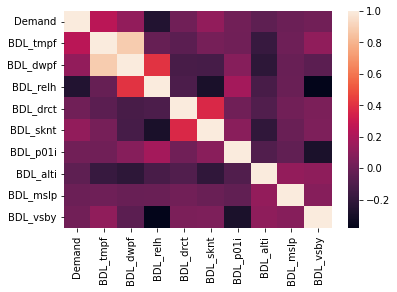

In [ ]:
# visulaizing the correlation
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [ ]:
# relative humidity seems to be strongly correlated with wind speed and visibility
# precipitation is also strongly correlated with visibility
# since this is weather data these correlations are expected

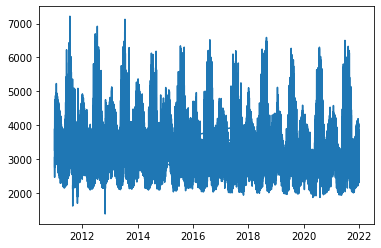

In [ ]:
plt.plot(df['Datetime'], df['Demand'])
plt.show()

# (0 pts - up to you!) Feature Engineering
You may NOT use past energy usage as a feature in the model. Keep the target variable df['Demand'] separate from the other X features.

While it will be useful to set the datetime column as the index (to create temporal features for modeling), you should not use the raw time stamp in your model.

You are welcome to grab additional dataset to enrich your features for modeling - just be sure not to leak the target variable! Ask Dave if you want to make sure before submitting.

# Train/Test Split
Everyone will use Jan 1, 2019 and beyond as test data. Everything before this date is train data.

In [ ]:
#Set date as index to split data into train and test 
df.set_index(df['Datetime'], inplace=True)
df.head() # the Date column is now the index  

,Datetime,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,,
2019-01-01 00:00:00,2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
2019-01-01 01:00:00,2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2019-01-01 02:00:00,2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
2019-01-01 03:00:00,2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
2019-01-01 04:00:00,2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
# we separate the year 2012-2019 for train data
train_data = df['2012-01-01':'2019-12-31']
# train_data = train_data.reset_index(drop=True)
#Drop data column as this is not needed for modeling
train_data.drop(['Datetime'],inplace=True,axis=1)
#Check data is deleted 
train_data.head() 

,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,
2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
train_data.shape

(70031, 10)

In [ ]:
# we separate the year 2020 for test data 
test_data = df['2019-01-01':'2019-12-31']
#Delete data column as we no longer need it 
# test_data = test_data.reset_index(drop=True)
test_data.drop(['Datetime'],inplace=True,axis=1)
#Check data column is deleted 
test_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Demand,BDL_tmpf,BDL_dwpf,BDL_relh,BDL_drct,BDL_sknt,BDL_p01i,BDL_alti,BDL_mslp,BDL_vsby
Datetime,,,,,,,,,,
2019-01-01 00:00:00,2713.617,37.9,37.9,100.0,360.0,4.0,0.0700,29.88,1009.7,5.0
2019-01-01 01:00:00,2578.343,37.9,37.9,100.0,360.0,4.0,0.1100,29.79,1006.3,2.0
2019-01-01 02:00:00,2467.969,37.9,37.9,100.0,340.0,7.0,0.0100,29.70,1003.3,2.0
2019-01-01 03:00:00,2397.140,37.9,37.9,100.0,310.0,6.0,0.0100,29.63,1002.3,1.5
2019-01-01 04:00:00,2381.258,37.9,37.9,100.0,140.0,3.0,0.0001,29.58,1001.2,1.5


In [ ]:
test_data.shape

(8759, 10)

In [ ]:
y_train = train_data['Demand']
X_train = train_data.drop(['Demand'], axis = 1)

y_test = test_data['Demand']
X_test = test_data.drop(['Demand'], axis = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape) 

(70031, 9) (70031,)
(8759, 9) (8759,)


# Baseline Model Spot Checking

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# First we create a list of pipelines all of which use StandardScaler for preprocessing followed by one of our baseline model candidates
pipelines = []
pipelines.append(('StandardScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('StandardScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))
pipelines.append(('StandardScaledGBR', Pipeline([('Scaler', StandardScaler()),('GBR', GradientBoostingRegressor())])))
pipelines.append(('StandardScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))
pipelines

[('StandardScaledLR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LR', LinearRegression())])),
 ('StandardScaledDTR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('DTR', DecisionTreeRegressor())])),
 ('StandardScaledGBR', Pipeline(steps=[('Scaler', StandardScaler()),
                  ('GBR', GradientBoostingRegressor())])),
 ('StandardScaledRFR',
  Pipeline(steps=[('Scaler', StandardScaler()), ('RFR', RandomForestRegressor())]))]

In [ ]:
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, r2_score
import numpy as np

In [ ]:
# Next, we can evaluate each algorithm against the other through a loop and using kfold cross validation
model_evals = []
model_names = []
for name, model in pipelines:
    kfold = KFold(n_splits = 5, random_state = 17017,
                  shuffle = True)
    # scoring used are MAE and RMSE. MAE will tell us how off the models generally are and RMSE will
    # help us see the models' susceptibility to outliers. This will aid us in our choice of model.
    cv_results = cross_validate(model, X_train, y_train,
                                 cv = kfold,
                                 scoring = ['neg_mean_absolute_error',
                                            'neg_root_mean_squared_error'])
    model_evals.append(cv_results)
    model_names.append(name)
    msg = f"{name} | MAE: {np.mean(cv_results['test_neg_mean_absolute_error'])} ({np.std(cv_results['test_neg_mean_absolute_error'])}) | RMSE: {np.mean([np.sqrt(i*-1) for i in cv_results['test_neg_root_mean_squared_error']])} ({np.std([np.sqrt(i*-1) for i in cv_results['test_neg_root_mean_squared_error']])})"
    print(msg)

StandardScaledLR | MAE: -551.76374649717 (1.8042302807867896) | RMSE: 26.267620956899435 (0.04681331729143018)
StandardScaledDTR | MAE: -459.73836408977894 (2.1629209384400747) | RMSE: 24.74685328033763 (0.06519434076148266)
StandardScaledGBR | MAE: -394.67310750079554 (2.0108607268352654) | RMSE: 21.842201377875835 (0.05108899567132205)
StandardScaledRFR | MAE: -351.62295846021476 (1.5516588228526786) | RMSE: 20.976783722924843 (0.055173914998694826)


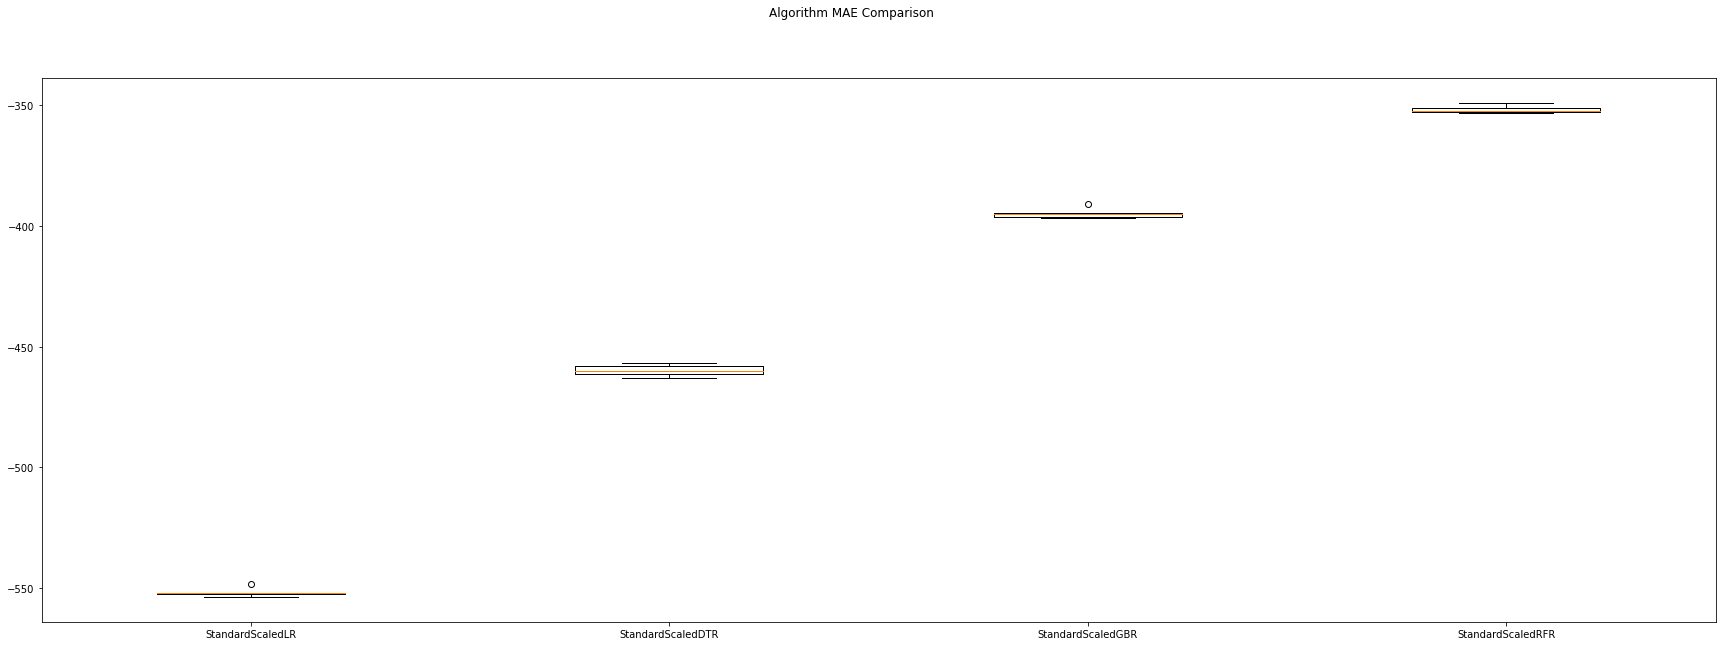

In [ ]:
models_mae = [i['test_neg_mean_absolute_error'] for i in model_evals]
models_rmse = [i['test_neg_root_mean_squared_error'] for i in model_evals]

plt.figure(figsize = (30,10))
plt.boxplot(models_mae, labels=model_names)
plt.suptitle('Algorithm MAE Comparison')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

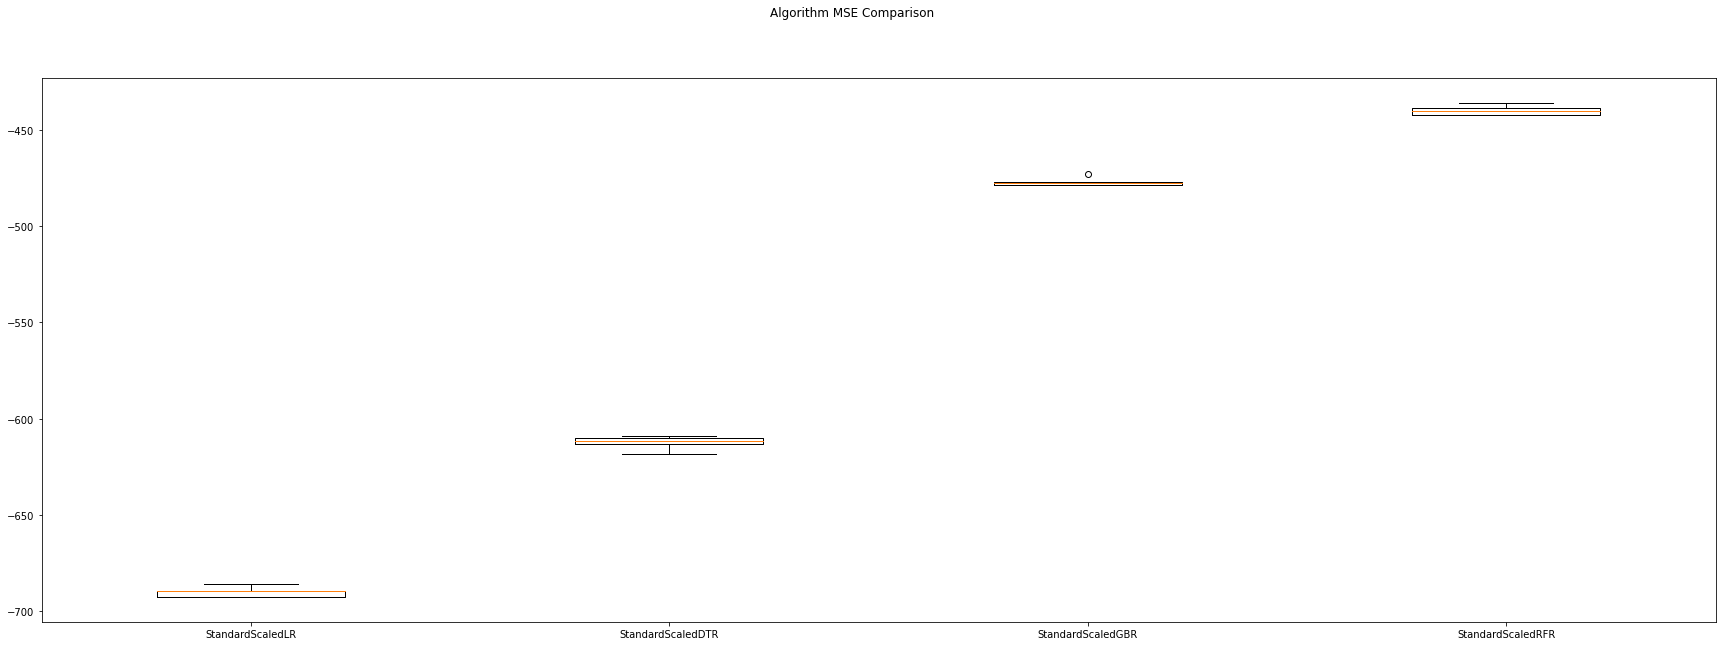

In [ ]:
plt.figure(figsize = (30,10))
plt.boxplot(models_rmse, labels=model_names)
plt.suptitle('Algorithm MSE Comparison')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

# Best Model Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# We know that RandomForest + StandardScaler is the best pipeline in terms of performance. Now let us get the best version of this baseline model/pipeline!
rfr_pipeline = Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])

In [ ]:
param_grid = {
    "RFR__n_estimators" : [500, 600],
    "RFR__max_depth" : [13, 14, 15], # depth must be very high because of the wide range of possible values (reaches a downward limit when depth is low, 
    "RFR__max_features" : [6, 7, 8],  # as forest aggregations can only reach as low as their mean)
    "RFR__min_samples_split" : [6, 7, 8],
    "RFR__warm_start" : [True, False],
    "RFR__oob_score" : [True, False],
}

In [ ]:
GS = GridSearchCV(rfr_pipeline, param_grid, verbose = 10, n_jobs = 4, scoring = 'neg_mean_absolute_error')
GS.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [ ]:
print("Best parameter (CV score=%0.3f):" % GS.best_score_)
print(GS.best_params_)

NameError: ignored

In [ ]:
best_params = {'RFR__max_depth': 13, 'RFR__max_features': 6, 'RFR__min_samples_split': 8, 'RFR__n_estimators': 600, 'RFR__oob_score': False, 'RFR__warm_start': True}
best_pipe = Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())]).set_params(**best_params)
best_pipe.fit(X_train, y_train)

In [ ]:
test_preds = best_pipe.predict(X_test)

The model above was first and foremost found through model spot checking and furthermore through multiple runs of CVGridSearch. Many adjustments had to be made with features such as n_estimators and max_depth. These had to be made after verifying the fit qualitatively and seeing that there was a limit for the lower end of the predictions (i.e., there was a limit to how low the demand predictions could be). After seeing that max_depth, and max_features was almost always at its highest when running different variations of CVGridSeach, a higher range was introduced to all of these to see how much higher the optimal parameters would be. After seeing that a higher range fit the training set well, and gave even better scores to the test set (no overfitting to train), these were decided upon. 